<a href="https://colab.research.google.com/github/kjoinmark/Machine-learning-NSU/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
"""
Вам предложена задача предсказания стоимости домов в Америке (что ли).
Воспользуйтесь известными библиотеками (sklearn, xgboost, lightgbm и catboost)
для решения данной задачи. Попробуйте каждую из предложенных библиотек,
оценить ее плюсы и минусы. Приветствуются различные методики
ансамблирования (стекинг, блендинг).
"""

'\nВам предложена задача предсказания стоимости домов в Америке (что ли).\nВоспользуйтесь известными библиотеками (sklearn, xgboost, lightgbm и catboost)\nдля решения данной задачи. Попробуйте каждую из предложенных библиотек,\nоценить ее плюсы и минусы. Приветствуются различные методики\nансамблирования (стекинг, блендинг).\n'

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_prices/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_prices/test.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print("Number of categorical features : {}".format(len(df_train.select_dtypes(include=['object']).columns)))
print("Number of continuous features : {}".format(len(df_train.select_dtypes(include=['int64', 'float64']).columns)))

Number of categorical features : 43
Number of continuous features : 38


In [ ]:
df_train.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [ ]:
df_train = df_train.drop(columns =['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'])

In [ ]:
print(df_train.MasVnrType.value_counts())
df_train.MasVnrType = df_train.MasVnrType.fillna(value = 'None')
print(df_train.MasVnrType.value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [ ]:
print(df_train.BsmtQual.value_counts())
print(df_train.BsmtCond.value_counts()) #drop
print(df_train.BsmtExposure.value_counts())
print(df_train.BsmtFinType1.value_counts())
print(df_train.BsmtFinType2.value_counts()) #drop
df_train.BsmtQual = df_train.BsmtQual.fillna(value = 'N/A')
df_train.BsmtExposure = df_train.BsmtExposure.fillna(value = 'N/A')
df_train.BsmtFinType1 = df_train.BsmtFinType1.fillna(value = 'N/A')
print('\nAfter\n')
print(df_train.BsmtQual.value_counts())
print(df_train.BsmtExposure.value_counts())


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

After

TA     649
Gd     618
Ex     121
N/A     37
Fa      35
Name: BsmtQual, dtype: int64
No     953
Av     221
Gd     134
Mn     114
N/A     38
Name: BsmtExposure, dtype: int64


In [ ]:
print(df_train.Electrical.value_counts())#drop
print(df_train.GarageType.value_counts())
print(df_train.GarageFinish.value_counts()) 
print(df_train.GarageQual.value_counts()) #drop
print(df_train.GarageCond.value_counts()) #drop

df_train.GarageType = df_train.GarageType.fillna(value = 'N/A')
df_train.GarageFinish = df_train.GarageFinish.fillna(value = 'N/A')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [ ]:
df_train = df_train.drop(columns =['BsmtCond','BsmtFinType2','Electrical', 'GarageCond', 'GarageQual'])

In [ ]:
df_train.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [ ]:
df_train.select_dtypes(include=['int64', 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df_train.MasVnrArea = df_train.MasVnrArea.fillna(value = 0)
df_train.GarageYrBlt = df_train.GarageYrBlt.fillna(value = 0)
df_train.LotFrontage = df_train.LotFrontage.fillna(value = 0)

In [ ]:
from sklearn import preprocessing

df_train.MSZoning = (df_train.MSZoning == "RL")

df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,True,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,True,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,True,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,True,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,True,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,True,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,No,Unf,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,True,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,No,ALQ,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,True,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,No,GLQ,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,True,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,Mn,GLQ,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
print(np.shape(df_train))
df_train = df_train.drop(columns = ['Id'])

(1460, 71)


In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
SalePrice,0,0.0
ExterQual,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterCond,0,0.0
YearBuilt,0,0.0


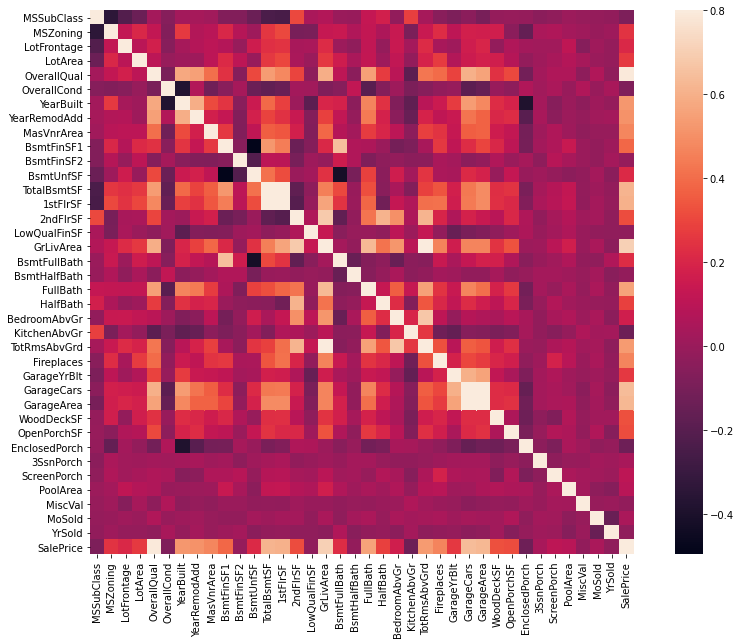

In [ ]:
import seaborn as sns
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax = 0.8, cbar=True, square=True)

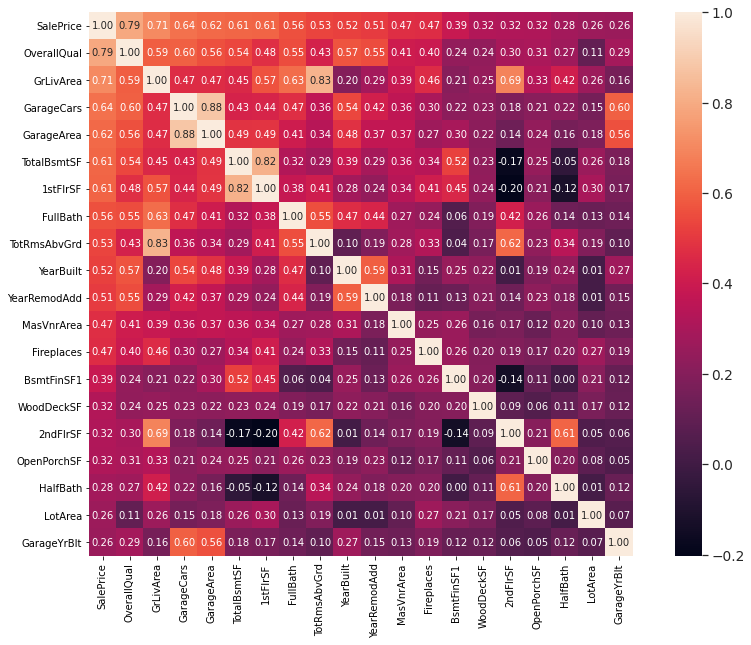

In [ ]:
k = 20
f, ax = plt.subplots(figsize=(15, 10))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
df_train = df_train.drop(columns = ['TotRmsAbvGrd', 'GarageArea', '1stFlrSF'])

In [ ]:
features = df_train.columns.drop(['SalePrice'])

In [ ]:
dummied_train = pd.get_dummies(df_train)
features_dummied = dummied_train.columns.drop(['SalePrice'])

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(dummied_train[features_dummied], dummied_train['SalePrice'], test_size=0.3, random_state=10)
#trainX_o, testX_o, trainY_o, testY_o = train_test_split(df_train[features], df_train['SalePrice'], test_size=0.3, random_state=10)


In [ ]:
trainX.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_N/A,GarageFinish_Fin,GarageFinish_N/A,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
912,30,False,51.0,6120,5,7,1925,1950,0.0,489,0,279,768,0,0,1015,0,0,1,0,3,1,0,1925.0,1,0,0,112,0,120,0,620,7,2006,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
373,20,True,79.0,10634,5,6,1953,1953,0.0,428,180,0,608,0,0,1319,1,0,1,0,3,1,0,1953.0,1,66,0,0,0,0,0,0,11,2009,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
20,60,True,101.0,14215,8,5,2005,2006,380.0,0,0,1158,1158,1218,0,2376,0,0,3,1,4,1,1,2005.0,3,240,154,0,0,0,0,0,11,2006,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
800,60,True,79.0,12798,6,5,1997,1997,0.0,462,0,154,616,1072,0,1688,1,0,2,1,4,1,0,1997.0,2,403,114,185,0,0,0,400,5,2008,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
152,60,True,0.0,14803,6,5,1971,1971,252.0,416,0,409,825,896,0,1993,0,0,2,1,4,1,1,1971.0,2,0,66,0,0,0,0,0,6,2006,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

"""
base_estimatorobject, default=None
The base estimator from which the boosted ensemble is built. If None, then the base estimator is DecisionTreeRegressor(max_depth=3).

n_estimatorsint, default=50
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

learning_ratefloat, default=1.
Learning rate shrinks the contribution of each regressor by learning_rate. There is a trade-off between learning_rate and n_estimators.

loss{‘linear’, ‘square’, ‘exponential’}, default=’linear’
The loss function to use when updating the weights after each boosting iteration.

random_stateint or RandomState, default=None
Controls the random seed given at each base_estimator at each boosting iteration. Thus, it is only used when base_estimator exposes a random_state. 
In addition, it controls the bootstrap of the weights used to train the base_estimator at each boosting iteration. 
Pass an int for reproducible output across multiple function calls. See Glossary.
"""

parameters_Ada = {'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 50, 'random_state': 10}

ada = AdaBoostRegressor(**parameters_Ada)
ada.fit(trainX, trainY)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='exponential',
                  n_estimators=50, random_state=10)

In [ ]:
result_ada = ada.predict(testX)
print(ada.score(testX, testY))
print(mean_squared_error(np.log(testY), np.log(result_ada), squared = False))


0.8145060265582277
0.21352465096506987


In [ ]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
n_estim_grid = np.linspace(10, 500, 50, dtype=int)

# Обучаем на тренировочном датасете
for n_estim in n_estim_grid:
    rfc = AdaBoostRegressor(n_estimators=n_estim, random_state=42)
    rfc.fit(trainX, trainY)
    train_acc.append(rfc.score(trainX, trainY))
    test_acc.append(rfc.score(testX, testY))

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)

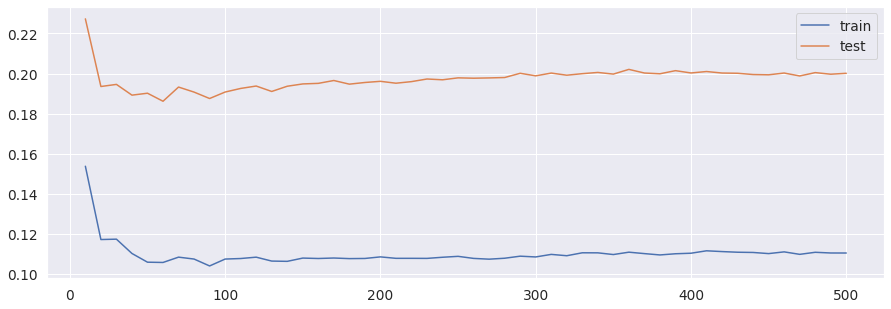

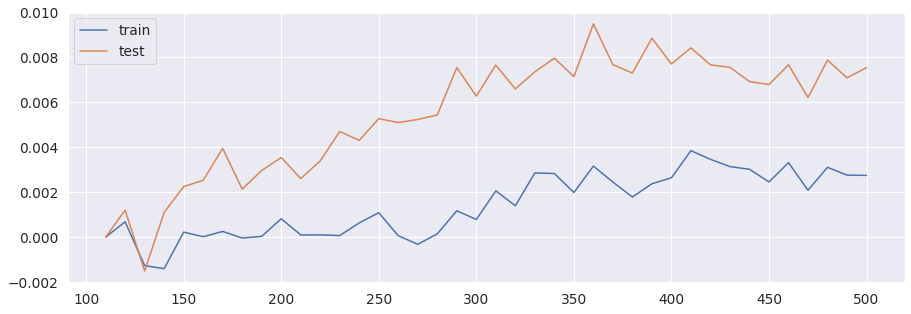

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(n_estim_grid, 1-train_acc, label = 'train')
plt.plot(n_estim_grid, 1-test_acc, label = 'test') 
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
cut_last = 10
plt.plot(n_estim_grid[cut_last:], train_acc[cut_last] - train_acc[cut_last:], label = 'train')
plt.plot(n_estim_grid[cut_last:], test_acc[cut_last] - test_acc[cut_last:], label = 'test') 
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
"""
n_estimators — число деревьев в "лесу" (по дефолту – 10)
    criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")
    max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".
    max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)
    min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)
    min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)
    min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес)
    max_leaf_nodes — максимальное количество листьев (по дефолту нет ограничения)
    min_impurity_split — порог для остановки наращивания дерева (по дефолту 1е-7)
    bootstrap — применять ли бустрэп для построения дерева (по дефолту True)
    oob_score — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False)
    n_jobs — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
    random_state — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int
    verbose — вывод логов по построению деревьев (по дефолту 0)
    warm_start — использует уже натренированую модель и добавляет деревьев в ансамбль (по дефолту False)
"""

'\nn_estimators — число деревьев в "лесу" (по дефолту – 10)\n    criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")\n    max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".\n    max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)\n    min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)\n    min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)\n    min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес)\n    max_leaf_nodes — максимальное к

In [ ]:
train_acc = []
test_acc = []
n_estim_grid = np.linspace(10, 1000, 50, dtype=int)

# Обучаем на тренировочном датасете
for n_estim in n_estim_grid:
    rfc = RandomForestRegressor(max_depth = 3, n_estimators=n_estim, random_state=42, n_jobs = -1)
    rfc.fit(trainX, trainY)
    train_acc.append(rfc.score(trainX, trainY))
    test_acc.append(rfc.score(testX, testY))

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)

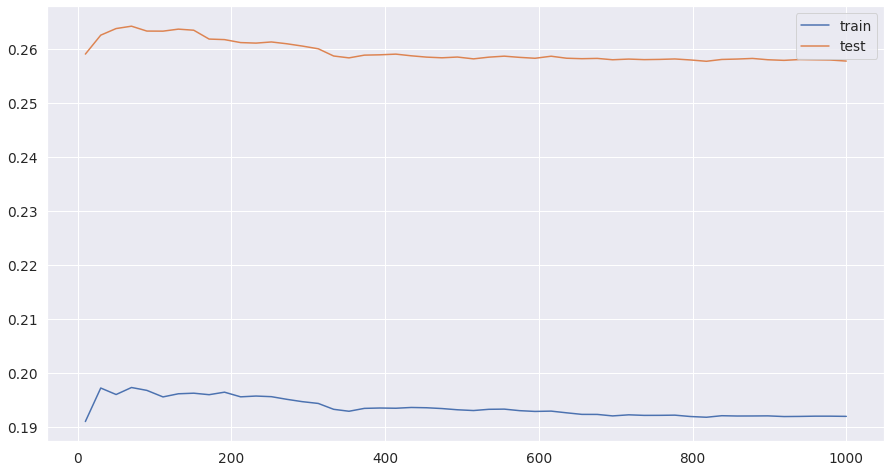

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(n_estim_grid, 1-train_acc, label = 'train')
plt.plot(n_estim_grid, 1-test_acc, label = 'test') 
plt.legend()
plt.show()

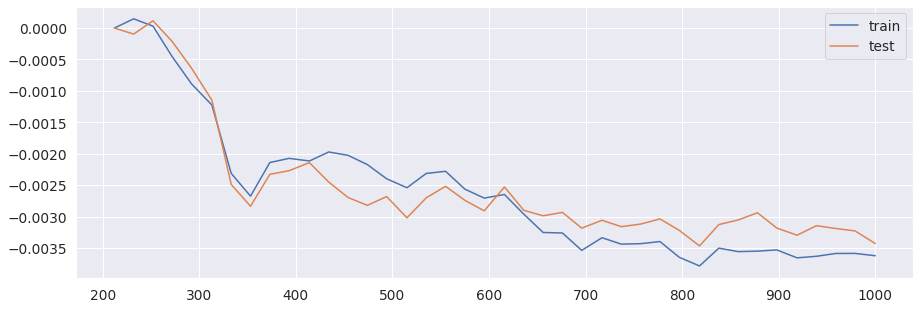

In [ ]:
plt.figure(figsize=(15,5))
cut_last = 10
plt.plot(n_estim_grid[cut_last:], train_acc[cut_last] - train_acc[cut_last:], label = 'train')
plt.plot(n_estim_grid[cut_last:], test_acc[cut_last] - test_acc[cut_last:], label = 'test') 
plt.legend()
plt.show()

In [ ]:
train_acc = []
test_acc = []
max_depth_grid = np.linspace(1, 15, 15, dtype=int)

# Обучаем на тренировочном датасете
for grid in max_depth_grid:
    rfc = RandomForestRegressor(max_depth = grid, n_estimators=500, random_state=42, n_jobs = -1)
    rfc.fit(trainX, trainY)
    train_acc.append(rfc.score(trainX, trainY))
    test_acc.append(rfc.score(testX, testY))

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)

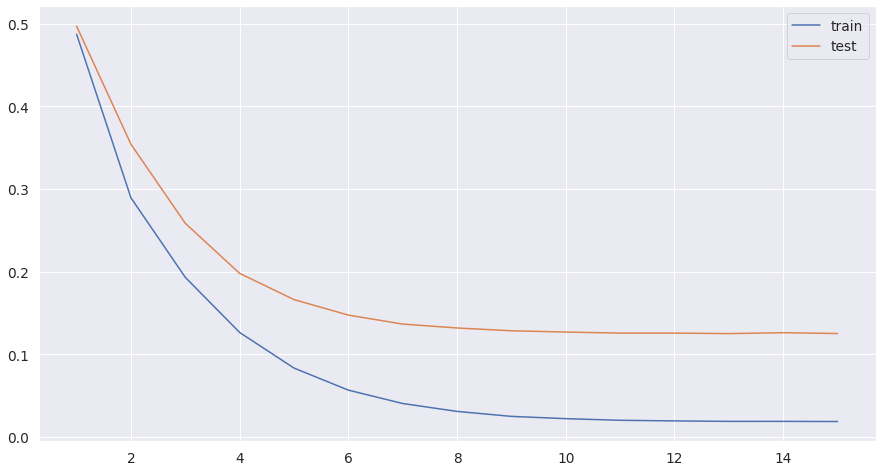

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(max_depth_grid, 1-train_acc, label = 'train')
plt.plot(max_depth_grid, 1-test_acc, label = 'test') 
plt.legend()
plt.show()

In [ ]:
import time
start_time = time.time()
rfr = RandomForestRegressor()
rfr.fit(trainX, trainY)
print("--- %s seconds ---" % ((time.time() - start_time)))


--- 1.989842414855957 seconds ---


In [ ]:
result_rfr = rfr.predict(testX)
print(rfr.score(testX, testY))
print(mean_squared_error(np.log(testY), np.log(result_rfr), squared = False))


0.8750457620327446
0.14967794133366458


In [ ]:
import xgboost as xg 


In [ ]:
train_acc = []
test_acc = []
n_estim_grid = np.linspace(10, 1000, 50, dtype=int)

# Обучаем на тренировочном датасете
for n_estim in n_estim_grid:
    rfc = xg.XGBRegressor(tree_method='gpu_hist', n_estimators=n_estim, random_state=42, n_jobs = -1, silent  = True)
    rfc.fit(trainX, trainY)
    train_acc.append(rfc.score(trainX, trainY))
    test_acc.append(rfc.score(testX, testY))

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)

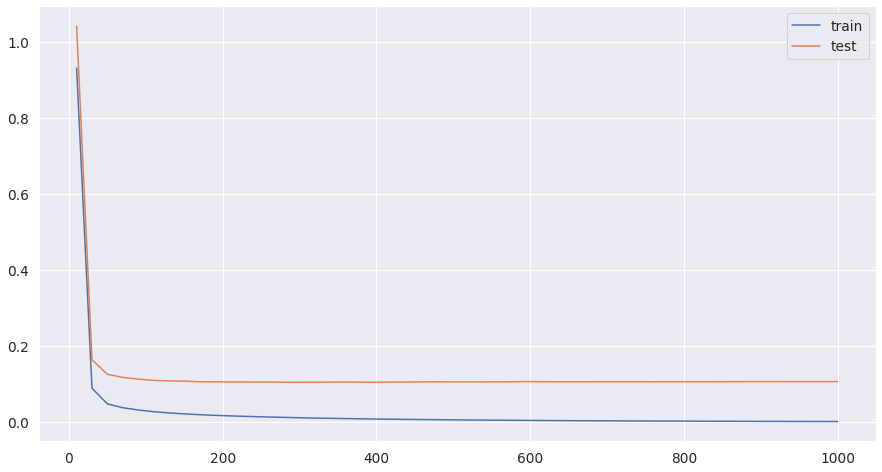

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(n_estim_grid, 1-train_acc, label = 'train')
plt.plot(n_estim_grid, 1-test_acc, label = 'test') 
plt.legend()
plt.show()

In [ ]:
print(train_acc)

[0.06927593 0.91087669 0.95190317 0.96209804 0.96796148 0.97268378
 0.97584582 0.97836412 0.98047113 0.98218778 0.98372322 0.98491219
 0.98603702 0.98710893 0.98796016 0.98910375 0.98972202 0.99039218
 0.99095931 0.99162694 0.99210725 0.99264031 0.99301651 0.99340926
 0.99384062 0.99426648 0.99457668 0.99485338 0.9951343  0.99543445
 0.9957395  0.9959482  0.99616554 0.99637226 0.99656209 0.99672801
 0.99691903 0.99706377 0.9971771  0.99729459 0.99745554 0.99754931
 0.99766627 0.99779157 0.99794598 0.99802606 0.99815    0.99822177
 0.99830035 0.99837223]


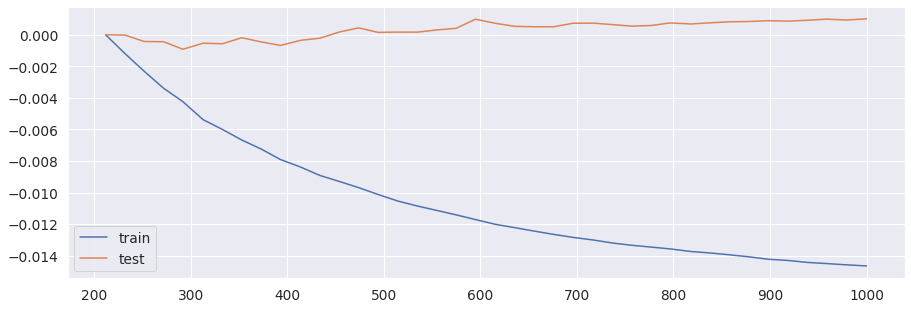

In [ ]:
plt.figure(figsize=(15,5))
cut_last = 10
plt.plot(n_estim_grid[cut_last:], train_acc[cut_last] - train_acc[cut_last:], label = 'train')
plt.plot(n_estim_grid[cut_last:], test_acc[cut_last] - test_acc[cut_last:], label = 'test') 
plt.legend()
plt.show()

In [ ]:
xgb_reg = xg.XGBRegressor(tree_method='gpu_hist', 
                          gpu_id=0,
                          booster = 'gbtree',
                          colsample_bytree=0.4,
                          gamma=0,                 
                          learning_rate=0.1,
                          max_depth=3,
                          min_child_weight=1.5,
                          n_estimators=280,                                                                    
                          reg_alpha=0.75,
                          reg_lambda=0.45,
                          subsample=0.6,
                          seed=42)

xgb_reg.fit(trainX, trainY) 
result_xgb = xgb_reg.predict(testX)
print(xgb_reg.score(testX, testY))

[10:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8969598264025245


In [ ]:
print(mean_squared_error(np.log(testY), np.log(result_xgb), squared = False))


0.13283038889201876


In [ ]:
xgb_lin = xg.XGBRegressor(booster = 'gblinear',
                          objective= 'reg:linear',
                          eta=1,
                          subsample=1, 
                          lambda_reg = 0, 
                          lambda_bias=0, 
                          alpha=0,
                          seed=42)
xgb_lin.fit(trainX, trainY)
result_xgb_lin = xgb_lin.predict(testX)
print(xgb_lin.score(testX, testY))
print(mean_squared_error(np.log(testY), np.log(result_xgb_lin), squared = False))

[10:25:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.812605280176273
0.1710228608728086


In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(n_jobs = -1).fit(trainX, trainY)
result_linreg = linreg.predict(testX)

print(linreg.score(testX, testY))

mean_squared_error(np.log(testY), np.log(abs(result_linreg)), squared = False)

0.838618012812503


0.3132815683808975